# Tarea 3.1. Programación de Inteligencia Artificial

Tarea correspondiente a la UD03 del módulo Programación de Inteligencia Artificial. 

# Importación de librerías necesarias


In [1]:
#añade las librerías básicas que consideres necesarias para el proyecto (pongo 3). Posteriormente podrás añadir más librerías. 
import os
import numpy as np 
import pandas as pd 

# Descarga del dataset

A continuación se procede a descargar el dataset y la explicación de sus atributos. 

In [2]:
#https://drive.google.com/file/d/1I7WagDoN1AuVYoUTaonEOHF_gw_UCb16
!gdown --id 1I7WagDoN1AuVYoUTaonEOHF_gw_UCb16

## Carga del fichero en Python
df_train = pd.read_csv('heart_disease.csv', delimiter=',')

df_train.head(5)

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1I7WagDoN1AuVYoUTaonEOHF_gw_UCb16
To: /content/heart_disease.csv
100% 11.3k/11.3k [00:00<00:00, 16.4MB/s]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


El nombre de los atributos del dataset es intuitivo. Sin embargo, hay ciertas columnas que necesitan explicación.

1. **age**: Edad de la persona en años

2. **sex**: Sexo de la persona (1 = varon, 0 = mujer)

3. **cp**: Tipo de dolor en el pecho (Value 1: tipico de angina, Value 2: atipico angina, Value 3: no hay dolor de angina, Value 4: asintomático)

4. **trestbps**: La presión sanguínea de la persona en reposo(mm Hg en la admisión al hospital)

5. **chol**: El colesterol de la persona en mg/dl

6. **fbs**: Nivel de azúcar en sangre en ayunas de la pesona (> 120 mg/dl, 1 = true; 0 = false)

7. **restecg**: Medición electrocardiográfica en reposo (0 = normal, 1 = anormalidad de la onda ST-T, 2 = hipertrofia probable o definitiva del ventrículo izquierdo según los criterios de Estes)

8. **thalach**: Frecuencia cardiaca máxima alcanzada por la persona. 

9. **exang**: Angina inducida por ejercicio (1 = yes; 0 = no)

10. **oldpeak**: Descenso del ST inducido por el ejercicio en relación con el reposo ('ST' se relaciona con las posiciones en el gráfico de ECG)

11. **slope**: la pendiente del segmento ST del ejercicio máximo (Valor 1: pendiente ascendente, Valor 2: plano, Valor 3: pendiente descendente)

12. **ca**: El número de buques principales (0-4)

13. **thal**: un trastorno de la sangre llamado talasemia (3 = normal; 6 = defecto fijo; 7 = defecto reversible)

14. **target**: Enfermedad cardiaca (0 = no, 1 = yes)


# Ejercicio 1. Información del dataset

## Ejercicio 1.1. Visualización básica del dataset

*   Muestra el número de ocurrencias que presentan enfermedades cardiovasculares y que no. Utiliza un diagrama de barras. 

*   Balancea ambos conjuntos de tal forma que no se añada ninguna ocurrencia artificial. Es decir, recorta aquel conjunto que contenga menos ocurrencias. 



<BarContainer object of 2 artists>

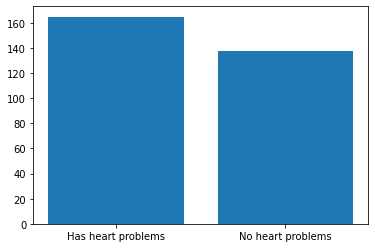

In [3]:
import matplotlib.pyplot as plt
#visualización
not_healthy = df_train[df_train['target'] == 1].shape[0]
healthy = df_train[df_train['target'] == 0].shape[0]
plt.bar(['Has heart problems', 'No heart problems'], [not_healthy, healthy])

In [4]:
from sklearn.utils import resample
#balanceamiento
df_may = df_train[df_train['target'] == 1]
df_min = df_train[df_train['target'] == 0]

df_majority_downsampled = resample(df_min, 
                                 n_samples=len(df_may),
                                 replace=True,      
                                 random_state=42) 

df_train = pd.concat([df_may, df_majority_downsampled])

## Ejercicio 1.2. Correlación de variables

* Muestra la matríz de correlación de todas las variables.
* Crea una variable llamada **corr_variables** con el nombre de las variables más correlacionadas con target (más de 0,3). 

**Recuerda que un valor muy próximo a -1 también indica una alta correlación, por lo que habrá que tomar los valores absolutos**


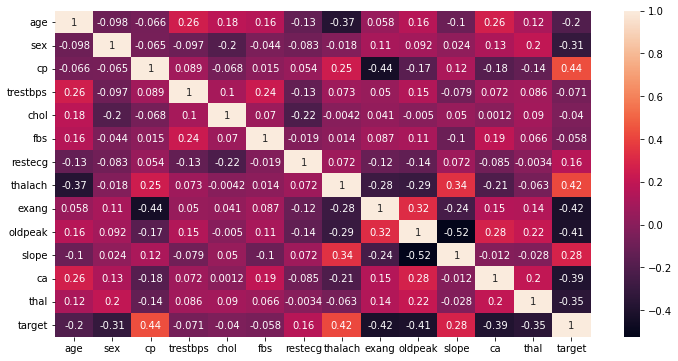

In [5]:
import seaborn as sns
#visualizar la matriz de correlación (utiliza una librería de visualización)
plt.figure(figsize = (12,6))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [6]:
#obtener el array con las variables que tengan una correlación con target mayor que 0.3
variables = df_train.corr().loc[:, 'target']
corr_variables = variables[np.abs(variables) > 0.3].index

print(corr_variables)

Index(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target'], dtype='object')


# Ejercicio 2. Preprocesamiento de datos

## Ejercicio 2.1. One hot encoding

Hasta ahora hemos utilizado one hote encoding para transformar variables categóricas en numéricas. Pero también podemos hacerlo para crear nuevas columnas a partir de los diferentes valores categóricos (aunque sean números) de una columna en concreto. 

Por ejemplo, la columna cp define el tipo de dolor en el pecho y sus valores pueden ser 1, 2, 3 o 4. Esta columna la podemos dividir en cuatro columnas nuevas cp_0, cp_1, cp_2, cp_3 y cp_4 con valores binarios 0 o 1. 

**Identifica aquellas columnas cuyos valores sean categóricos (aunque sean enteros) y dividelas en columnas binarias con valores 0 y 1. Elimina la columna original.**

In [7]:
# nos fijamos en valores minimos y maximos que seran enteros de 0 a x
df_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,54.321212,0.706061,0.927273,130.524242,244.318182,0.160606,0.512121,148.948485,0.339394,1.044545,1.424242,0.760606,2.339394,0.500000
std,9.101914,0.456256,1.031796,17.332815,51.796234,0.367725,0.506647,22.588302,0.474223,1.129832,0.605462,1.022673,0.623715,0.500759
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.500000
75%,62.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
categorical_columns = ['ca', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [9]:
#Descategorizar variables utilizando one hot enconding
def onehot_encode(df, column):
    for name in column:
      df = df.copy()
      dummies = pd.get_dummies(df[name], prefix=name) 

      df = pd.concat([df, dummies], axis=1)
      df = df.drop(name, axis=1)         
    return df
    

df_train = onehot_encode(df_train, categorical_columns)
df_train.head(5)

,age,trestbps,chol,thalach,oldpeak,target,ca_0,ca_1,ca_2,ca_3,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Ejercicio 3. División del dataset



## Ejercicio 3.1. División en entrenamiento y test
**Divide el dataset de tal forma que el 80% sea de entrenamiento y el 20% para test**.



In [10]:
from sklearn.model_selection import train_test_split
# División del dataset en las variables X_train, X_test, y_train, y_test
df_train_y = df_train['target']
df_train_x = df_train.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, train_size=0.80, shuffle=True, random_state=1, stratify=df_train['target'])

## Ejercicio 3.2. Normalización del conjunto de entrenamiento y test

**Normaliza los datos tanto de test como de entrenamiento**

In [11]:
from sklearn.preprocessing import MinMaxScaler
#normalización
scaler = MinMaxScaler()                                                 
nomalized_train = scaler.fit_transform(X_train)                        
nomalized_test = scaler.transform(X_test)                        
X_train = pd.DataFrame(nomalized_train, columns=X_train.columns)
X_test = pd.DataFrame(nomalized_test, columns=X_test.columns)

In [12]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,ca_0,ca_1,ca_2,ca_3,ca_4,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.733333,0.415094,0.383562,0.267176,0.306452,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.800000,0.575472,0.326484,0.587786,0.129032,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.288889,0.509434,0.269406,0.816794,0.129032,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.755556,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.644444,0.245283,0.360731,0.679389,0.290323,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
X_test.head()

,age,trestbps,chol,thalach,oldpeak,ca_0,ca_1,ca_2,ca_3,ca_4,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.488889,0.056604,0.219178,0.549618,0.193548,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.333333,0.339623,0.212329,0.893130,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.755556,0.339623,0.292237,0.580153,0.225806,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,0.377358,0.178082,0.694656,0.129032,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.733333,0.320755,0.187215,0.526718,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Ejercicio 4. Generación de modelos

### Ejercicio 4.1. Definición de función que muestre informe sobre una predicción


1.   Crea una función que reciba (1) un array con los valores que se deberían obtener de la predicción (y_test); y (2) un array con los valores predichos por un modelo concreto (y_pred). La función deberá generar un informe con:

  1.1.   Muestra la exactitud, precisión, y recall del modelo generado. 

  1.2.   Visualiza la matriz de confusión del modelo.

  1.3.   Visualiza un grafo con su curva ROC y área AUC

Una posible cabecera de la función podría ser: 

```python
def informe_modelo(y_test, y_pred):
```


1.2 Funcion para mostar la matriz de confusion 

In [14]:
from sklearn.metrics import confusion_matrix

def mostar_matriz_confusion(pred, y_test):
  cm = confusion_matrix(pred, y_test)
  ax = plt.subplot()

  sns.heatmap(cm, annot=True, ax=ax, cmap='Blues');
  ax.set_xlabel('Valores Predichos');
  ax.set_ylabel('Valores Reales');
  ax.xaxis.set_ticklabels([1, 0]); 
  ax.yaxis.set_ticklabels([1, 0]);
  plt.show()

1.3 Funcion para mostar las curvas ROC y AUC

In [15]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

def mostrar_curva_roc_y_auc(pred, y_test):
  #calculo el ratio de verdaderos positivos y falsos positivos. 
  fpr, tpr, _ = roc_curve(y_test, pred)
  
  #con estos valores obtengo el valor para la AUC
  roc_auc = auc(fpr, tpr)
  
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestClassifier')
  display.plot()
  plt.show()

Informe completo del modelo

In [16]:
from sklearn.metrics import classification_report

def informe_modelo(y_test, predict):
  clf_report = pd.DataFrame(classification_report(y_test, predict, output_dict=True))
 
  print("Test Result:\n================================================")        
  print(f"1.1 Reporte de clasificacion:\n{clf_report}")
  print("================================================")
  print("1.2 Matriz de confusion")
  mostar_matriz_confusion(predict, y_test)
  print("================================================")
  print("1.3 Curva ROC y área AUC")
  mostrar_curva_roc_y_auc(predict, y_test)
  

## Ejercicio 4.2. Crear modelo: RandomForestClassifier

1.  Crea un modelo utilizando **RandomForestClassifier** (anterior Unidad Didáctica). 

2.  Utilizando la función del ejercicio 4.1, muestra el informe de este modelo entrenado con el conjunto de entrenamiento obtenido en el ejercicio 3.1.

In [17]:
from sklearn.ensemble import  RandomForestClassifier
# Creo el modelo

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Test Result:
1.1 Reporte de clasificacion:
                   0          1  accuracy  macro avg  weighted avg
precision   0.875000   0.852941  0.863636   0.863971      0.863971
recall      0.848485   0.878788  0.863636   0.863636      0.863636
f1-score    0.861538   0.865672  0.863636   0.863605      0.863605
support    33.000000  33.000000  0.863636  66.000000     66.000000
1.2 Matriz de confusion


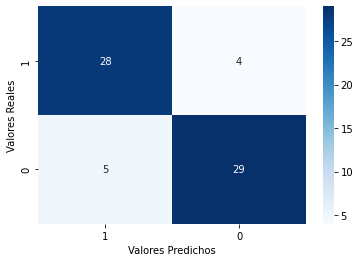

1.3 Curva ROC y área AUC


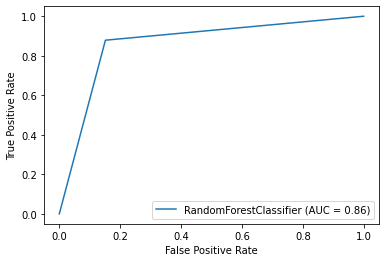

In [18]:
#muestro el informe
informe_modelo(y_test, model.predict(X_test))

## Ejercicio 4.3. Validación cruzada del anterior modelo

1.   Valida en anterior modelo utilizando Cross Validation (con KFold). Muestra la exactitud, precisión, y recall del modelo tras la validación cruzada. 



In [19]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

kfold = model_selection.KFold(n_splits=5)

results = model_selection.cross_validate(estimator=model,
                                          X=X_test,
                                          y=y_test,
                                          cv=kfold,
                                          scoring=scoring)

print(f"Accuracy: {results['test_accuracy'].mean():.3f}")
print(f"Precission: {results['test_precision'].mean():.3f}")
print(f"Recall: {results['test_recall'].mean():.3f}")

Accuracy: 0.727
Precission: 0.715
Recall: 0.736


2.   Valida en anterior modelo utilizando Cross Validation (con StratifiedKFold). Muestra la exactitud, precisión, y recall del modelo tras la validación cruzada. 


In [20]:
from sklearn.model_selection import StratifiedKFold

kfold = model_selection.StratifiedKFold(n_splits=5)

results = model_selection.cross_validate(estimator=model,
                                          X=X_test,
                                          y=y_test,
                                          cv=kfold,
                                          scoring=scoring)

print(f"Accuracy: {results['test_accuracy'].mean():.3f}")
print(f"Precission: {results['test_precision'].mean():.3f}")
print(f"Recall: {results['test_recall'].mean():.3f}")

Accuracy: 0.729
Precission: 0.725
Recall: 0.719



3.   Comenta qué diferencias han existido entre uno y otro ¿Por qué?

La principal caracteristica que diferencia KFold y StratifiedKFold es que StratifiedKFold asegura que, en el proceso de validacion los grupos empleados (folds) en el test tienen la misma proporcion de datos con cierta etiqueta.

Es decir en un caso con 16 filas y (12 con etiqueta "A" y 4 con etiqueta "B") en cada iteracion usara la misma proporcion de clases.
2/3 de la clase "A" y 1/3 de la clase "B" en la validacion






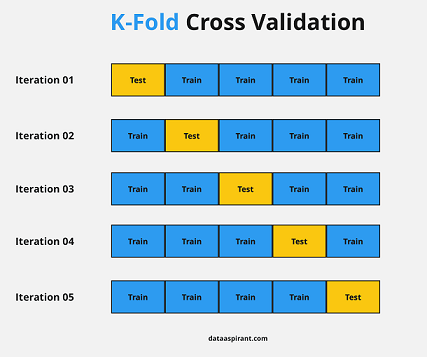

# Ejercicio 5. Generación de modelos utilizando redes neuronales

In [21]:
#importa las librerías necesarias
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

## Ejercicio 5.1. Desarrolla la arquitectura de la red neuronal. 

Desarrolla la arquitectura necesaria para crear una red neuronal que pueda predecir el riesgo de sufrir un problema cardiaco ante una entrada determinada. 



In [22]:
df_train.shape

(330, 31)

In [45]:
#arquitectura red neuronal y compilación
neural_network = Sequential()

neural_network.add(Dense(14, activation="relu", input_shape=(30,)))
neural_network.add(Dense(1, activation="sigmoid"))

neural_network.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics="binary_accuracy")

neural_network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                434       
                                                                 
 dense_7 (Dense)             (None, 1)                 15        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


## Ejercicio 5.2. Entrena la red neuronal con el conjunto de test

Entrena la red utilizando 0.1 para la validación del modelo

In [46]:
#Entrenamiento de la red neuronal
history = neural_network.fit(X_train, y_train, batch_size=64, epochs=8, validation_split=0.1)

Epoch 1/8
4/4 [==============================] - 1s 101ms/step - loss: 0.6334 - binary_accuracy: 0.7046 - val_loss: 0.5854 - val_binary_accuracy: 0.8889
Epoch 2/8
4/4 [==============================] - 0s 23ms/step - loss: 0.6217 - binary_accuracy: 0.7511 - val_loss: 0.5769 - val_binary_accuracy: 0.8889
Epoch 3/8
4/4 [==============================] - 0s 19ms/step - loss: 0.6106 - binary_accuracy: 0.7806 - val_loss: 0.5685 - val_binary_accuracy: 0.8889
Epoch 4/8
4/4 [==============================] - 0s 22ms/step - loss: 0.5993 - binary_accuracy: 0.7975 - val_loss: 0.5607 - val_binary_accuracy: 0.8889
Epoch 5/8
4/4 [==============================] - 0s 17ms/step - loss: 0.5881 - binary_accuracy: 0.7932 - val_loss: 0.5530 - val_binary_accuracy: 0.8889
Epoch 6/8
4/4 [==============================] - 0s 18ms/step - loss: 0.5775 - binary_accuracy: 0.8143 - val_loss: 0.5448 - val_binary_accuracy: 0.8889
Epoch 7/8
4/4 [==============================] - 0s 18ms/step - loss: 0.5664 - binary_a

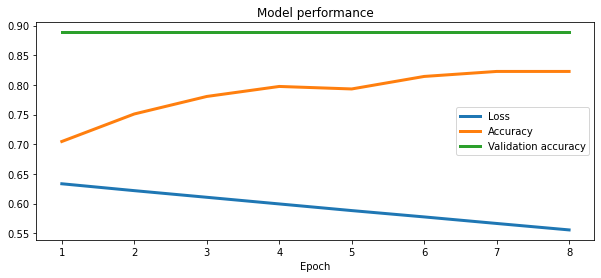

In [48]:
plt.figure(figsize=(10, 4))
plt.title('Model performance')
plt.plot(np.arange(1, 9), history.history['loss'], label='Loss', lw=3)
plt.plot(np.arange(1, 9), history.history['binary_accuracy'], label='Accuracy', lw=3)
plt.plot(np.arange(1, 9), history.history['val_binary_accuracy'], label='Validation accuracy', lw=3)
plt.xlabel("Epoch")
plt.legend()

## Ejercicio 5.3. Evaluación del modelo de red neuronal

1.   Realiza una predicción para el conjunto de datos reservados para test. 


In [56]:
pred = neural_network.predict(X_test)
pred = np.round(pred)

3/3 [==============================] - 0s 3ms/step


2.   Utiliza la función ```informe_modelo``` para mostrar las diferentes métricas para validar el modelo. 




Test Result:
1.1 Reporte de clasificacion:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.900000  0.863636   0.866667      0.866667
recall      0.909091   0.818182  0.863636   0.863636      0.863636
f1-score    0.869565   0.857143  0.863636   0.863354      0.863354
support    33.000000  33.000000  0.863636  66.000000     66.000000
1.2 Matriz de confusion


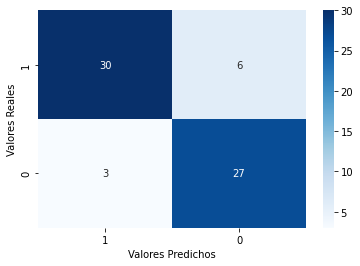

1.3 Curva ROC y área AUC


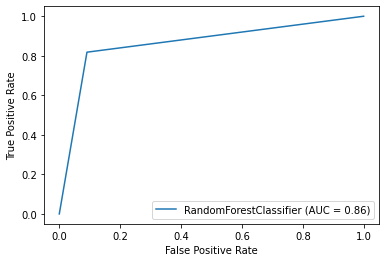

In [57]:
#mostrar informe
informe_modelo(y_test, pred)